In [1]:
import census
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('./change_0918.csv')

In [3]:
gentr = pd.read_csv('./data_gentrified_09_18.csv')
eligible = pd.read_csv('./data_eligible_not_09_18.csv')

In [4]:
ids = gentr.geoid.unique()
ids
ids_el = eligible.geoid.unique()
ids_el

array([34003021200, 34003029100, 34003018100, 34003021300, 34003023100,
       34003036200, 34003046300, 34003015400, 34003019102, 34003021400,
       34003021100, 34003021600, 34003030100, 34003021500, 34003011200,
       34013012200, 34013012400, 34013013100, 34013013700, 34013011200,
       34013017100, 34013018600, 34013011600, 34013004600, 34013004802,
       34013006800, 34013000400, 34013002201, 34013004900, 34013007501,
       34013009500, 34013012000, 34013012800, 34013013200, 34013013300,
       34013015800, 34013017700, 34013000300, 34013001700, 34013002202,
       34013011400, 34013018700, 34013017800, 34013018300, 34013018400,
       34013018900, 34013009100, 34013002600, 34013003500, 34013004200,
       34013005700, 34013008000, 34013010500, 34013003900, 34013000700,
       34013002000, 34013000900, 34013002800, 34013003800, 34013000100,
       34013003700, 34013007000, 34013001800, 34013000200, 34013000500,
       34013000800, 34013004100, 34013004300, 34013004801, 34013

In [5]:
data['gentrified'] = data.apply(lambda row: 1 if (row['geoid'] in ids) else 0, axis = 1)

In [6]:
data['eligible'] = data.apply(lambda row: 1 if ((row['geoid'] in ids_el) or (row['geoid'] in ids)) else 0, axis = 1)

In [7]:
data_el = data[data['eligible'] == 1]
data_el

,geoid,name,d_pop_%,d_medinc_%,d_medhomeval_%,d_white_pp,d_black_pp,d_hispanics_pp,d_eduatt_pp,gentrified,eligible
22,34003011200,"Census Tract 112, Bergen County, New Jersey",18.143161,24.402284,-11.333828,-17.787002,7.855906,12.332601,2.910162,0,1
29,34003015400,"Census Tract 154, Bergen County, New Jersey",28.953726,47.060000,-17.332628,4.059682,-12.373928,-4.404691,7.324239,0,1
37,34003018100,"Census Tract 181, Bergen County, New Jersey",7.065609,71.062607,-14.076690,-12.922700,0.866051,8.991370,1.943977,0,1
39,34003019102,"Census Tract 191.02, Bergen County, New Jersey",5.634695,58.856195,-16.118770,-0.241747,-0.324164,-7.839714,4.046584,0,1
43,34003021100,"Census Tract 211, Bergen County, New Jersey",4.597701,15.955898,2.515372,-1.084563,-3.771392,2.469199,8.324884,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3740,36119009300,"Census Tract 93, Westchester County, New York",31.521739,8.093765,199.695965,-3.840114,-21.940086,17.256558,1.852185,0,1
3795,36119013301,"Census Tract 133.01, Westchester County, New York",21.388667,-17.966818,-11.986681,-12.691801,-3.875511,16.852572,0.827049,0,1
3804,36119014100,"Census Tract 141, Westchester County, New York",2.933608,6.391941,-16.271552,-4.382561,8.460319,-11.215260,0.851218,0,1
3806,36119014300,"Census Tract 143, Westchester County, New York",10.988723,3.088369,-27.797834,2.903341,5.266055,-11.856123,1.057105,0,1


In [8]:
bkl = pd.read_excel('./udp_ny_final_typology_jan_2019.xlsx')

In [9]:
data['category'] = np.nan

In [10]:
for i in range(len(data)):
    geoid = data.iloc[i]['geoid']
    if len(bkl[bkl['geoid'] == geoid]) > 0:
        data['category'].iloc[i] = bkl[bkl['geoid'] == geoid].iloc[0]['Type_1.19']

In [11]:
data

,geoid,name,d_pop_%,d_medinc_%,d_medhomeval_%,d_white_pp,d_black_pp,d_hispanics_pp,d_eduatt_pp,gentrified,eligible,category
0,34003001000,"Census Tract 10, Bergen County, New Jersey",2.454545,24.437017,-2.857143,-0.908822,-0.075946,-0.471794,4.631403,0,0,VHI - Super Gentrification or Exclusion
1,34003002100,"Census Tract 21, Bergen County, New Jersey",-24.651394,-23.780201,99.999900,-14.069795,5.657640,0.726440,-0.450873,0,0,MHI - Stable Exclusion
2,34003002200,"Census Tract 22, Bergen County, New Jersey",4.157044,22.264130,-12.899011,-6.444664,1.020912,4.016436,13.890994,0,0,MHI - Stable Exclusion
3,34003002300,"Census Tract 23, Bergen County, New Jersey",-5.505034,36.038018,-4.725955,-4.216798,-1.155176,4.800948,1.622442,0,0,MHI - Stable Exclusion
4,34003003100,"Census Tract 31, Bergen County, New Jersey",5.183673,-1.500227,-13.084356,1.970968,2.686370,3.755165,1.434923,0,0,MHI - Stable Exclusion
...,...,...,...,...,...,...,...,...,...,...,...,...
3820,36119014809,"Census Tract 148.09, Westchester County, New York",-16.795339,-11.525382,-21.559551,-5.857507,-0.770545,6.801232,3.075347,0,0,MHI - Stable Exclusion
3821,36119014907,"Census Tract 149.07, Westchester County, New York",24.692971,25.367244,-10.715057,-9.620531,3.143336,6.570134,-1.652336,0,0,MHI - Stable Exclusion
3822,36119014908,"Census Tract 149.08, Westchester County, New York",15.208090,27.020705,-9.488728,3.144524,0.081520,-2.078460,1.471380,0,0,MHI - Stable Exclusion
3823,36119015000,"Census Tract 150, Westchester County, New York",-1.165679,1.751659,-10.641603,-10.242317,1.784266,4.460368,5.073978,0,0,MHI - Stable Exclusion


In [12]:
data['category'].value_counts()

MHI - Stable Exclusion                                1572
MHI - Ongoing Exclusion                                515
LI - Not Losing Low-Income Households                  388
LI - Ongoing Displacement of Low-Income Households     308
MHI - Advanced Gentrification                          304
LI - At Risk of Gentrification                         293
VHI - Super Gentrification or Exclusion                235
LI - Ongoing Gentrification                            201
Missing Data                                             8
Name: category, dtype: int64

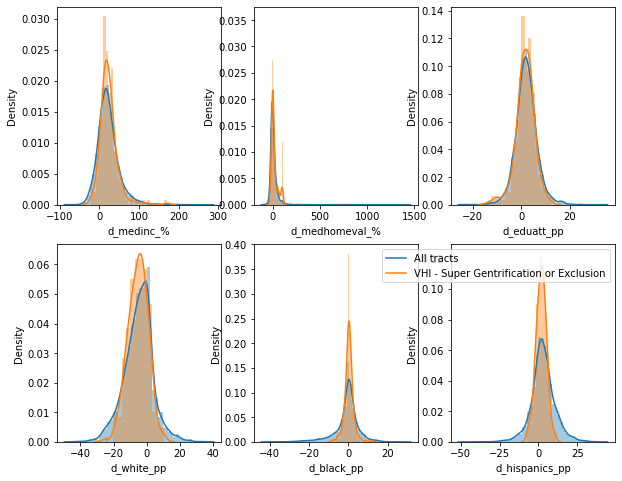

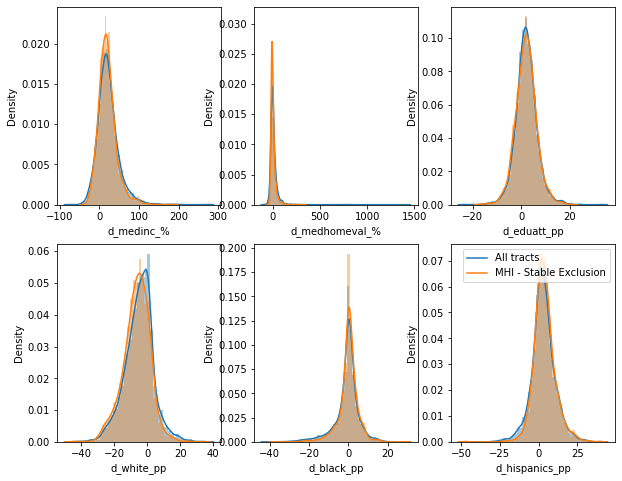

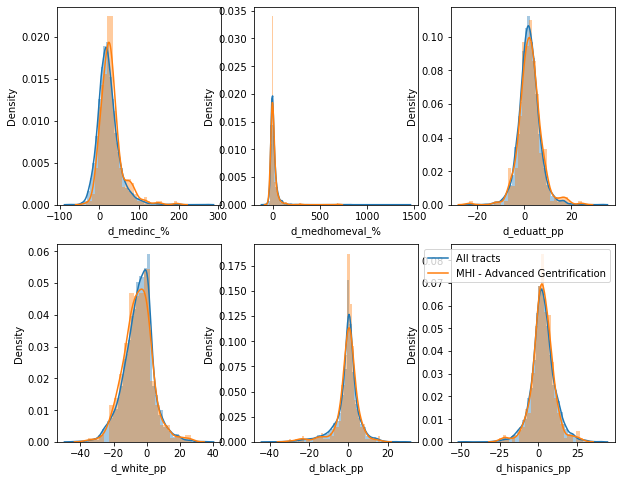

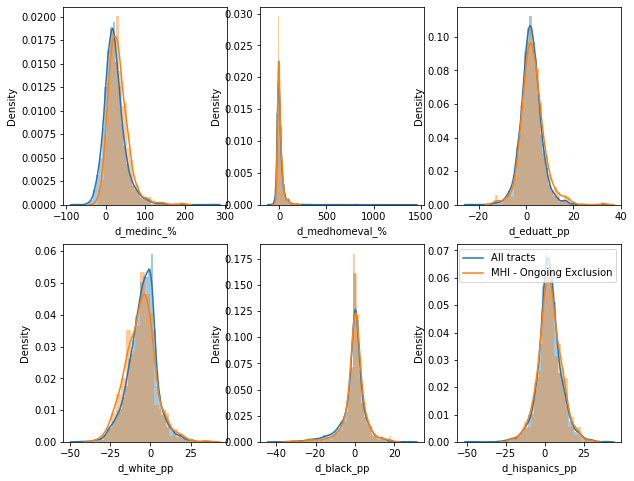

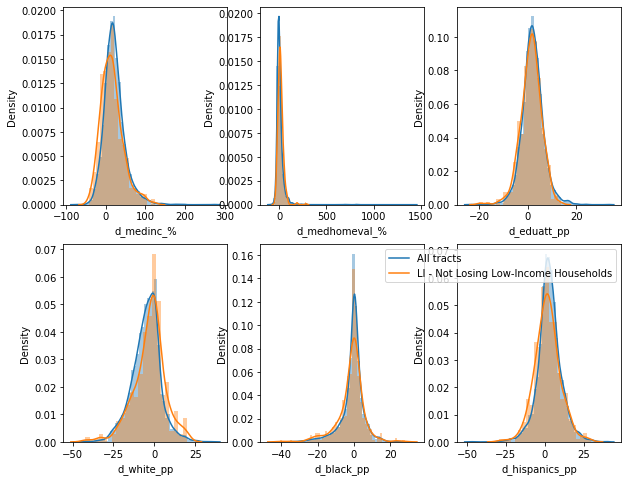

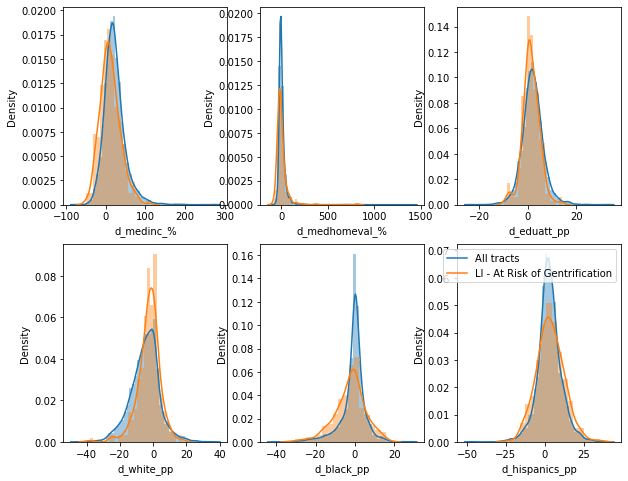

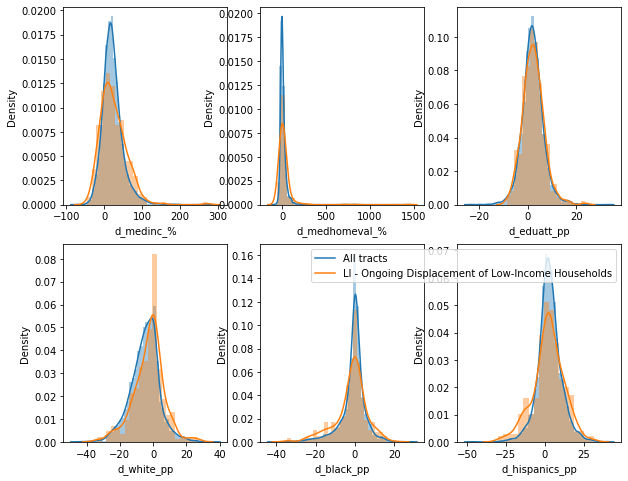

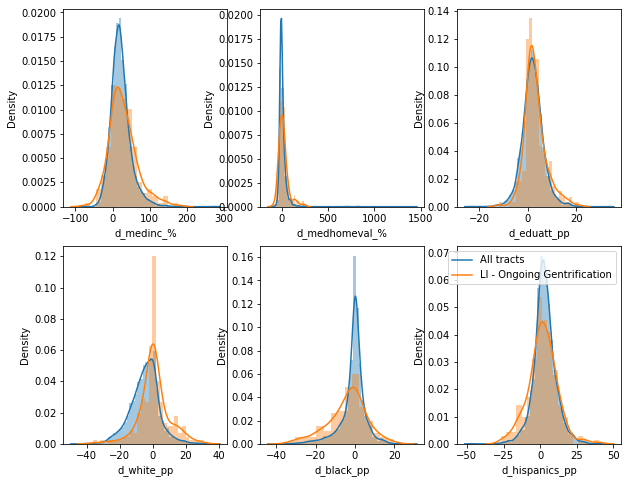

In [13]:
import seaborn as sns

categs = ['VHI - Super Gentrification or Exclusion',
       'MHI - Stable Exclusion', 'MHI - Advanced Gentrification',
       'MHI - Ongoing Exclusion', 'LI - Not Losing Low-Income Households',
       'LI - At Risk of Gentrification',
       'LI - Ongoing Displacement of Low-Income Households',
       'LI - Ongoing Gentrification']

for i in range(len(categs)):
    c = categs[i]

    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 8));


    sns.distplot(data['d_medinc_%'], ax=axes[0,0]);
    sns.distplot(data[data['category'] == c]['d_medinc_%'], ax=axes[0,0]);

    sns.distplot(data['d_medhomeval_%'], ax=axes[0,1]);
    sns.distplot(data[data['category'] == c]['d_medhomeval_%'], ax=axes[0,1]);
    
    sns.distplot(data['d_eduatt_pp'], ax=axes[0,2]);
    sns.distplot(data[data['category'] == c]['d_eduatt_pp'], ax=axes[0,2]);
    sns.distplot(data['d_white_pp'], ax=axes[1,0]);
    sns.distplot(data[data['category'] == c]['d_white_pp'], ax=axes[1,0]);
    sns.distplot(data['d_black_pp'], ax=axes[1,1]);
    sns.distplot(data[data['category'] == c]['d_black_pp'], ax=axes[1,1]);
    sns.distplot(data['d_hispanics_pp'], ax=axes[1,2]);
    sns.distplot(data[data['category'] == c]['d_hispanics_pp'], ax=axes[1,2]);
    
    plt.legend(['All tracts', c])
    
    plt.savefig('dist_'+str(i)+'.png')
    



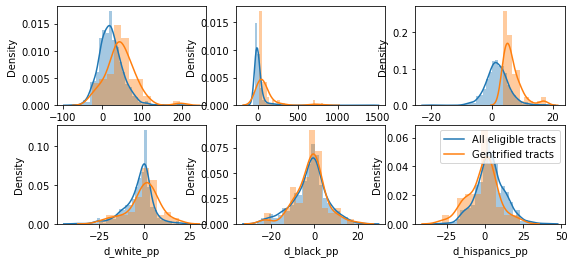

In [74]:
fig, axes = plt.subplots(nrows=2, ncols=3);
plt.subplots_adjust(right=1.3);
axes[0,0].set_ylabel(None);
axes[0,1].set_ylabel(None);
axes[0,2].set_ylabel(None);
axes[1,0].set_ylabel(None);
axes[1,1].set_ylabel(None);
axes[1,2].set_ylabel(None);


sns.distplot(data_el['d_medinc_%'], ax=axes[0,0]);
sns.distplot(data_el[data_el['gentrified'] == 1]['d_medinc_%'], ax=axes[0,0]);

sns.distplot(data_el['d_medhomeval_%'], ax=axes[0,1]);
sns.distplot(data_el[data_el['gentrified'] == 1]['d_medhomeval_%'], ax=axes[0,1]);
    
sns.distplot(data_el['d_eduatt_pp'], ax=axes[0,2]);
sns.distplot(data_el[data_el['gentrified'] == 1]['d_eduatt_pp'], ax=axes[0,2]);
sns.distplot(data_el['d_white_pp'], ax=axes[1,0]);
sns.distplot(data_el[data_el['gentrified'] == 1]['d_white_pp'], ax=axes[1,0]);
sns.distplot(data_el['d_black_pp'], ax=axes[1,1]);
sns.distplot(data_el[data_el['gentrified'] == 1]['d_black_pp'], ax=axes[1,1]);
sns.distplot(data_el['d_hispanics_pp'], ax=axes[1,2]);
sns.distplot(data_el[data_el['gentrified'] == 1]['d_hispanics_pp'], ax=axes[1,2]);
    
plt.legend(['All eligible tracts', 'Gentrified tracts'])

    
plt.savefig('dist_el_col.png')

In [73]:
cols = ['d_medinc_%', 'd_medhomeval_%',
       'd_white_pp', 'd_black_pp', 'd_hispanics_pp', 'd_eduatt_pp']

from scipy.stats import ks_2samp

for col in cols:
    x1 = data_el[col]
    x2 = data_el[data_el['gentrified'] == 1][col]
    print(col + ":")
    print(ks_2samp(x1, x2))
    print("All eligible tracts: mean, variance and skewness")
    print(x1.mean(), x1.std(), x1.skew())
    print("Gentrified tracts: mean, variance and skewness")
    print(x2.mean(), x2.std(), x2.skew())

d_medinc_%:
Ks_2sampResult(statistic=0.39607248097814135, pvalue=5.1663562317116885e-09)
All eligible tracts: mean, variance and skewness
21.030102688309842 29.504015629439873 0.7568974511707903
Gentrified tracts: mean, variance and skewness
45.24914727281657 37.026678306755436 0.8456532535150619
d_medhomeval_%:
Ks_2sampResult(statistic=0.7213352685050798, pvalue=1.1102230246251565e-16)
All eligible tracts: mean, variance and skewness
15.55197774101694 94.12087842584306 8.304033425096579
Gentrified tracts: mean, variance and skewness
95.98980981940892 154.87102380599035 3.501157602709301
d_white_pp:
Ks_2sampResult(statistic=0.24172054360733605, pvalue=0.0013848550282391514)
All eligible tracts: mean, variance and skewness
-3.058218650548178 7.708663469855874 -0.8210133038944107
Gentrified tracts: mean, variance and skewness
-0.2433788865453953 8.87193076989344 -0.6272464317821382
d_black_pp:
Ks_2sampResult(statistic=0.07263491225755377, pvalue=0.8832980280707455)
All eligible tracts: m

,KS test p-value,Eligible tracts mean,Gentrified tracts mean,Eligible tracts st.dev.,Gentrified tracts st.dev.
d_medinc_%,0.000,21.030,45.249,29.504,37.027
d_medhomeval_%,0.000,15.552,95.990,94.121,154.871
d_white_pp,0.001,-3.058,-0.243,7.709,8.872
d_black_pp,0.883,-2.079,-1.762,7.977,7.030
d_hispanics_pp,0.004,3.596,-1.214,9.311,9.813
d_eduatt_pp,0.000,1.715,6.599,3.787,3.070


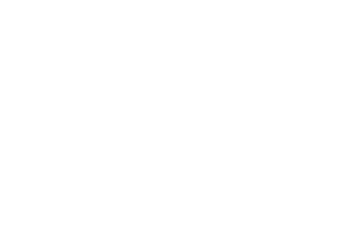

In [69]:
from pandas.plotting import table 

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table = pd.DataFrame({'KS test p-value':[1.0,2.0,4.0,5.0,6.0,7.0], 'Eligible tracts mean':[0.0,0.0,0.0,0.0,0.0,0.0], 'Gentrified tracts mean':[0.0,0.0,0.0,0.0,0.0,0.0], 'Eligible tracts st.dev.':[0.0,0.0,0.0,0.0,0.0,0.0], 'Gentrified tracts st.dev.':[0.0,0.0,0.0,0.0,0.0,0.0]}, index =cols)
#table = table.reindex(cols)
for i in range(len(table)):
    col = table.index[i]
    x1 = data_el[col]
    x2 = data_el[data_el['gentrified'] == 1][col]
    table.iloc[i]['KS test p-value'] = ks_2samp(x1, x2).pvalue
    table.iloc[i]['Eligible tracts mean'] = x1.mean()
    table.iloc[i]['Eligible tracts st.dev.'] = x1.std()
    table.iloc[i]['Gentrified tracts mean'] = x2.mean()
    table.iloc[i]['Gentrified tracts st.dev.'] = x2.std()
    
table = table.round(3)
table

In [72]:
print(table.to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &  KS test p-value &  Eligible tracts mean &  Gentrified tracts mean &  Eligible tracts st.dev. &  Gentrified tracts st.dev. \\
\midrule
d\_medinc\_\%     &            0.000 &                21.030 &                  45.249 &                   29.504 &                     37.027 \\
d\_medhomeval\_\% &            0.000 &                15.552 &                  95.990 &                   94.121 &                    154.871 \\
d\_white\_pp     &            0.001 &                -3.058 &                  -0.243 &                    7.709 &                      8.872 \\
d\_black\_pp     &            0.883 &                -2.079 &                  -1.762 &                    7.977 &                      7.030 \\
d\_hispanics\_pp &            0.004 &                 3.596 &                  -1.214 &                    9.311 &                      9.813 \\
d\_eduatt\_pp    &            0.000 &                 1.715 &                   6.599 &             